<a href="https://colab.research.google.com/github/ellaclauz/Hybrid/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The correlation coefficient

The *correlation coefficient* measures the strength of the linear relationship between two variables. Graphically, it measures how clustered the scatter plot is around a straight line.

The term *correlation coefficient* isn't easy to say, so it is usually shortened to *correlation* and denoted by $r$.

Here are some mathematical facts about $r$ that we will just observe by simulation.

- The correlation coefficient $r$ is a number between $-1$ and 1.
- $r$ measures the extent to which the scatter plot clusters around a straight line.
- $r = 1$ if the scatter plot is a perfect straight line sloping upwards, and $r = -1$ if the scatter plot is a perfect straight line sloping downwards.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

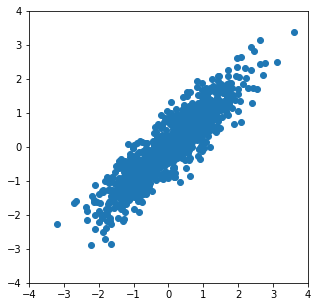

In [3]:
r_scatter(0.9)

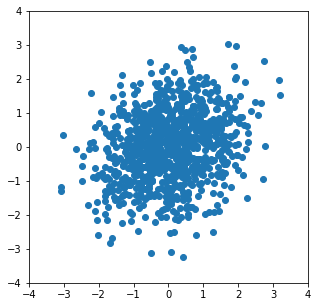

In [4]:
r_scatter(0.25)

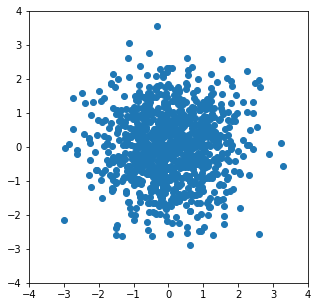

In [5]:
r_scatter(0)

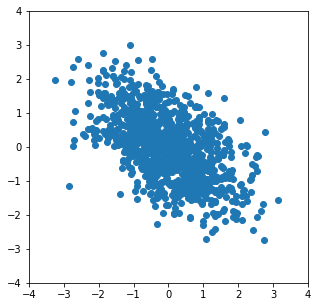

In [6]:
r_scatter(-0.55)

## Calculating $r$

**Formula for $r$**:

**$r$ is the average of the products of the two variables, when both variables are measured in standard units.**

We will apply the steps of calculating r to a simple DataFrame of values of $x$ and $y$.

In [7]:
range(1,7, 1)

range(1, 7)

In [8]:
np.arange(1,7, 1)

array([1, 2, 3, 4, 5, 6])

In [9]:
x = np.arange(1, 7, 1)
def new_func():
    y = np.array([2, 3, 1, 5, 2, 7])
    return y

y = new_func()
t = pd.DataFrame(data = {'x': x, 'y': y})
t

,x,y
0,1,2
1,2,3
2,3,1
3,4,5
4,5,2
5,6,7


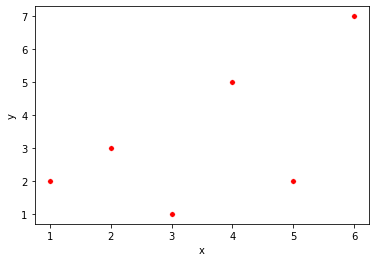

In [10]:
sn.scatterplot(data=t, x='x', y='y', s=30, color='red')
plt.show()

Based on the scatter plot, we expect that $r$ will be positive but not equal to 1.

**Step 1.** Convert each variable to standard units.

In [11]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

In [12]:
t_su = pd.DataFrame({'x (standard units)': standard_units(x), 'y (standard units)':standard_units(y)})
t_su

,x (standard units),y (standard units)
0,-1.46385,-0.648886
1,-0.87831,-0.162221
2,-0.29277,-1.135550
3,0.29277,0.811107
4,0.87831,-0.648886
5,1.46385,1.784436


**Step 2.** Multiply each pair of standard units.

In [13]:
t_product = t_su.copy()
t_product['product of standard units'] = t_su['x (standard units)'] * t_su['y (standard units)']
t_product

,x (standard units),y (standard units),product of standard units
0,-1.46385,-0.648886,0.949871
1,-0.87831,-0.162221,0.142481
2,-0.29277,-1.135550,0.332455
3,0.29277,0.811107,0.237468
4,0.87831,-0.648886,-0.569923
5,1.46385,1.784436,2.612146


**Step 3.** $r$ is the average of the products computed in Step 2.

In [14]:
# r is the average of the products of standard units

r = np.mean(t_product["product of standard units"])
r

0.6174163971897709

As expected, $r$ is positive but not equal to 1.

## Properties of $r$

The calculation shows that:

- $r$ is a pure number. It has no units. This is because $r$ is based on standard units.
- $r$ is unaffected by changing the units on either axis. This too is because $r$ is based on standard units.
- $r$ is unaffected by switching the axes. Algebraically, this is because the product of standard units does not depend on which variable is called $x$ and which $y$. Geometrically, switching axes reflects the scatter plot about the line $y=x$, but does not change the amount of clustering nor the sign of the association.

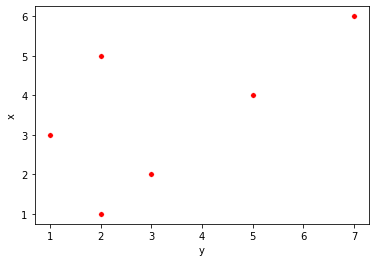

In [15]:
sn.scatterplot(data=t, x='y', y='x', s=30, color='red')
plt.show()

## The `correlation` function
We are going to be calculating correlations repeatedly, so it will help to define a function that computes it by performing all the steps described above. Let's define a function ``correlation`` that takes a DataFrame and the labels of two columns in the DataFrame. The function returns $r$, the mean of the products of those column values in standard units.

In [16]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

Let's call the function on the ``x`` and ``y`` columns of ``t``. The function returns the same answer to the correlation between $x$ and $y$ as we got by direct application of the formula for $r$. 

In [17]:
correlation(t, 'x', 'y')

0.6174163971897709

As we noticed, the order in which the variables are specified doesn't matter.

In [18]:
correlation(t, 'y', 'x')

0.6174163971897709

## Association is not Causation

Correlation only measures association. Correlation does not imply causation. For example, though the correlation between the weight and the math ability of children in a school district may be positive, that does not mean that doing math makes children heavier or that putting on weight improves the children's math skills. In this example, age is a confounding variable: older children are both heavier and better at math than younger children, on average.

## Correlation Measures *Linear* Association
Correlation measures only one kind of association – linear. Variables that have strong non-linear association might have very low correlation. Here is an example of variables that have a perfect quadratic relation $y = x^2$ but have correlation equal to 0.

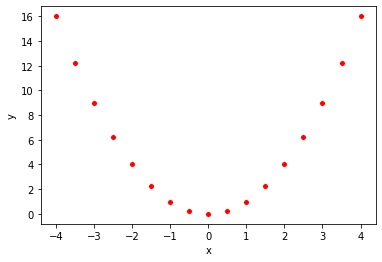

In [19]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = pd.DataFrame(data={'x':new_x,'y':new_x**2})
sn.scatterplot(data=nonlinear, x='x', y='y', s=30, color='r')
plt.show()

In [20]:
correlation(nonlinear, 'x', 'y')

0.0

## Correlation is Affected by Outliers
Outliers can have a big effect on correlation. Here is an example where a scatter plot for which $r$ is equal to 1 is turned into a plot for which $r$ is equal to 0, by the addition of just one outlying point.

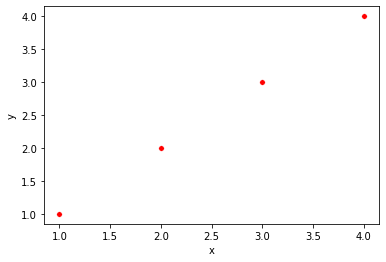

In [22]:
line = pd.DataFrame({'x': np.array([1, 2, 3, 4]), 'y': np.array([1, 2, 3, 4])})
sn.scatterplot(data=line, x='x', y='y', s=30, color='r')
plt.show()

In [23]:
correlation(line, 'x', 'y')

1.0

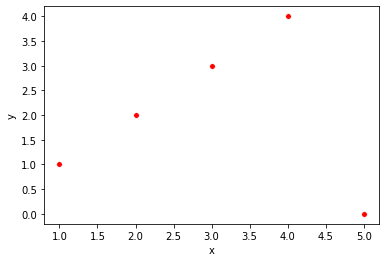

In [24]:
outlier = pd.DataFrame(data={'x': np.array([1, 2, 3, 4, 5]), 'y': np.array([1, 2, 3, 4, 0])})
sn.scatterplot(data=outlier, x='x', y='y', s=30, color='r')
plt.show()

In [27]:
correlation(outlier, 'x', 'y')

0.0